In [1]:
""" Imports """

import re

# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import nltk
import pandas as pd

# Загрузка необходимых ресурсов
nltk.download('vader_lexicon')
nltk.download('gutenberg')
nltk.download('book')
nltk.download('punkt') 
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.book import *
from nltk.text import Text as nltk_text_type

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import gutenberg

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.probability import ConditionalFreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kapuchinka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/kapuchinka/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloadi

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Модули для проведения эксперимента

### Количество символов, слов в словаре, мера лексического разнообразия (Статический анализ)

In [2]:
def static_analysis(text: nltk_text_type):
    text_length = len(text)
    dictionary_text = sorted(set(text))
    count_words_dictionary = len(dictionary_text)
    measure_lexical_diversity = count_words_dictionary / text_length
    
    return text_length, count_words_dictionary, measure_lexical_diversity

### Токенизация предложений

In [3]:
def tokenization_sentences(text: nltk_text_type, language: str = 'english'):
    word_list = text.tokens
    text_stroke = " ".join(word_list)
    sentences = sent_tokenize(text_stroke, language)
    
    return sentences

### Токенизация слов

In [4]:
def tokenization_words(text: nltk_text_type, language: str = 'english'):
    word_list = text.tokens
    text_stroke = " ".join(word_list)
    words = word_tokenize(text_stroke, language)
    words_tokenize = [word for word in words if re.match(r'\w+', word)]   
    
    return words_tokenize

### Удаление стоп-слов

In [5]:
def remove_stopwords(words_tokenize, language: str = 'english'):
    stop_words = set(stopwords.words(language))
    words_without_stopwords = [ word for word in words_tokenize if word.lower() not in stop_words]     
    
    return words_without_stopwords

### Частотный график

In [6]:
def cumulative_graphs(filtered_words, n: int = 1, is_cumulative: bool = True, title: str = ''):
    if is_cumulative:
        plt.figure(figsize=(12, 6))
        graph_cumul = FreqDist(filtered_words)
        graph_cumul.most_common(n)
        graph_cumul.plot(n, title=title, cumulative=True)
        plt.tight_layout()
        
    else:
        plt.figure(figsize=(12, 6))
        graph_freq = FreqDist(filtered_words)
        graph_freq.most_common(n)
        graph_freq.plot(n, title=title, cumulative=False)
        plt.tight_layout()

### Таблица частот слов в текстах корпуса

In [7]:
def modal_frequency_distribution(texts, modals):
    cfd = nltk.ConditionalFreqDist(
        (text, word.lower())
        for text in texts
        for word in gutenberg.words(text)
    )
    # return cfd
    cfd.tabulate(conditions=texts, samples=modals)

### Лемматизация, частовстречающиеся леммы, ключевые слова

In [8]:
def get_wordnet_pos(treebank_tag):
    """
    Преобразует POS-тег NLTK в формат WordNet.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizate_text(filtered_words):
    pos_tags = pos_tag(filtered_words)
    
    lemmatized_tokens = []
    for word, tag in pos_tags:
        wordnet_pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_tokens.append(lemma)

    return lemmatized_tokens
    
def frequently_encountered_lemms(lemmatizated_tokens, n: int = 1):
    fdist = FreqDist(lemmatizated_tokens)
    most_common_lemms_list = fdist.most_common(n)

    return most_common_lemms_list

def key_words(lemmatizated_tokens, n: int = 1):
    fdist = FreqDist(lemmatizated_tokens)
    
    key_words_list = [word for word, freq in fdist.items() if len(word) > 4 and freq > 5]
    
    key_words_list = sorted(key_words_list, key=lambda word: fdist[word], reverse=True)[0:n]
    
    return key_words_list

### Частотность слов в текстах корпуса 

In [9]:
def plot_conditional_freq_dist(target_words, corpus):
    cfd = ConditionalFreqDist(
        (target, fileid[:8])
        for fileid in corpus.fileids()
        for w in corpus.words(fileid)
        for target in target_words
        if w.lower().startswith(target)
    )
    return cfd

### Биграммы

In [10]:
def bigrams(filtered_words, keywords, n: int = 10):
    bigrams_list = list(nltk.bigrams(filtered_words))
    bigrams_inlude_keywords = []
    for bigram in bigrams_list:
        if bigram[0] in keywords or bigram[1] in keywords:
            bigrams_inlude_keywords.append(bigram)
    
    bigram_freq = FreqDist(bigrams_inlude_keywords)
    bigram_freq_most_common = bigram_freq.most_common(n)
    bigrams_most_common_list = []
    
    for bigram, freq in bigram_freq_most_common:
        bigrams_most_common_list.append({'bigram': bigram, 'freq': freq})
        
    return bigrams_most_common_list

### Анализ сентимента текста

In [11]:
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)  
    return score

### Основной модуль вызова эксперимента

In [12]:
def experiment(fileid: str, n: int = 20):
    text = Text(gutenberg.words(fileid))
    
    text_length, count_words_dictionary, measure_lexical_diversity = static_analysis(text)
    
    sentences = tokenization_sentences(text)
    
    words_tokenize = tokenization_words(text, language='english') 
    
    words_without_stopwords = remove_stopwords(words_tokenize)
    
    lemmatizated_words = lemmatizate_text(words_without_stopwords)
    
    most_common_lemms = frequently_encountered_lemms(lemmatizated_words, n=n)
    
    key_words_list = key_words(lemmatizated_words, n=n)
    
    bigrams_list = bigrams(words_without_stopwords, key_words_list, 10)
    
    return {
        'text_length': text_length,
        'count_words_dictionary': count_words_dictionary,
        'measure_lexical_diversity': measure_lexical_diversity,
        'count_sentences': len(sentences),
        'count_words': len(words_tokenize),
        'count_without_stopwords': len(words_without_stopwords),
        'words_without_stopwords': words_without_stopwords,
        'most_common_lemms': most_common_lemms,
        'bigrams': bigrams_list,
        'sentiment_analysis': sentiment_analysis(gutenberg.raw(fileid)),
    }

### Получение объекта с результатами экспериментов

In [13]:
def analysis(fileids):
        
    results = []
    for fileid in fileids:
        results.append(experiment(fileid, n=50))
    
    return results

### Модуль Таблицы Статического Анализа

In [14]:
def table_static_analyze(fileids, results):
    table_data = []
    for result in results:
        table_data.append([
            result['text_length'],
            result['count_sentences'],
            result['count_words'],
            result['count_without_stopwords'],
            result['count_words_dictionary'],
            result['measure_lexical_diversity'],
        ])
        
    columns = ['Количество символов', 'Количество предложений', 'Количество слов', 'Количество слов без стопов', 'Размер словаря', 'Мера лексического разнообразия']
    
    df = pd.DataFrame(table_data, columns=columns)
    
    for i in range(0, len(fileids)):
        df.rename(index={i: fileids[i]}, inplace=True)
        
    return df

### Модуль Таблицы сентиментального анализа

In [15]:
def table_sentiment_analyze(fileids, results):
    table_data = []
    for result in results:
        table_data.append([
            result['sentiment_analysis']['neg'],
            result['sentiment_analysis']['neu'],
            result['sentiment_analysis']['pos'],
            result['sentiment_analysis']['compound'],
        ])
        
    columns = ['neg', 'neu', 'pos', 'compound']
    
    df = pd.DataFrame(table_data, columns=columns)
    
    for i in range(0, len(fileids)):
        df.rename(index={i: fileids[i]}, inplace=True)
        
    return df

### Модуль Тематических слов в текстах корпусов

In [16]:
def lemmas(fileids, results):
    table_data = []
    
    for result in results:
        table_data.append([result['most_common_lemms']])
        
    columns = ['Тематические слова']
    
    df = pd.DataFrame(table_data, columns=columns)
    
    for i in range(0, len(fileids)):
        df.rename(index={i: fileids[i]}, inplace=True)
        
    return df

### Модуль Топ-10 биграмм в текстах корпуса

In [17]:
def top_bigrams_graph(bigrams_data, titles, figsize=(12, 6)):
    for j, group in enumerate(bigrams_data, start=0):
        fig = plt.figure(num=j, figsize=figsize)
        
        plt.clf()
        
        df = pd.DataFrame(group)
        df = df.sort_values('freq', ascending=False)

        bars = plt.bar(df['bigram'], df['freq'], color=plt.cm.tab20(j / len(bigrams_data)))

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2., height,
                     f'{int(height)}',
                     ha='center', va='bottom')

        plt.title(titles[j])
        plt.xlabel('Bigram')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()

    plt.show()

In [18]:
def top_bigrams(results, names):
    bigrams_list = []
    
    for result in results:
        bigrams_list.append(result['bigrams'])
        
    bigrams = []
    for i in range(0, len(bigrams_list)):
        mapped_bigrams = []
        for item in bigrams_list[i]:
            mapped_bigrams.append({'bigram': ' '.join(item['bigram']), 'freq': item['freq']})
        bigrams.append(mapped_bigrams)
        
    top_bigrams_graph(bigrams_data=bigrams, titles=names, figsize=(12, 6))

# Эксперимент
Получаем результаты и используем для вывода

In [19]:
fileids = gutenberg.fileids()
analysis_results = analysis(fileids)

## Статический Анализ Текстов Корпусов

In [20]:
table_static_analyze(gutenberg.fileids(), analysis_results)

,Количество символов,Количество предложений,Количество слов,Количество слов без стопов,Размер словаря,Мера лексического разнообразия
austen-emma.txt,192427,9282,162125,73390,7811,0.040592
austen-persuasion.txt,98171,3660,84209,38341,6132,0.062462
austen-sense.txt,141576,5540,120876,53951,6833,0.048264
bible-kjv.txt,1010654,29813,854230,436965,13769,0.013624
blake-poems.txt,8354,355,6942,3801,1820,0.217860
bryant-stories.txt,55563,2720,46725,21788,4420,0.079549
burgess-busterbrown.txt,18963,1023,16364,7617,1764,0.093023
carroll-alice.txt,34110,1629,27337,12242,3016,0.088420
chesterton-ball.txt,96996,4794,82894,39873,8947,0.092241
chesterton-brown.txt,86063,3736,73303,35335,8299,0.096429


## Сентиментальный Анализ Текстов Корпусов

In [21]:
table_sentiment_analyze(gutenberg.fileids(), analysis_results)

,neg,neu,pos,compound
austen-emma.txt,0.081,0.743,0.176,1.0000
austen-persuasion.txt,0.076,0.756,0.168,1.0000
austen-sense.txt,0.093,0.747,0.160,1.0000
bible-kjv.txt,0.068,0.830,0.102,1.0000
blake-poems.txt,0.135,0.654,0.211,1.0000
bryant-stories.txt,0.074,0.794,0.132,1.0000
burgess-busterbrown.txt,0.078,0.789,0.132,1.0000
carroll-alice.txt,0.088,0.818,0.094,0.9998
chesterton-ball.txt,0.106,0.784,0.111,0.9999
chesterton-brown.txt,0.094,0.795,0.111,1.0000


## График Частотности слов в Austen-Emma

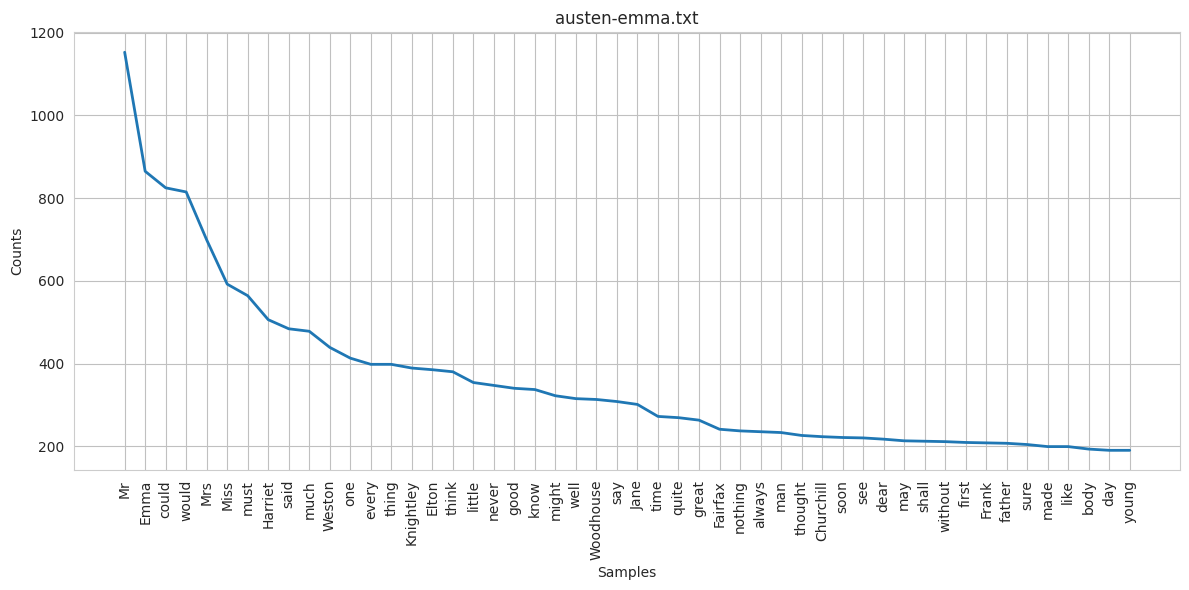

In [22]:
cumulative_graphs(analysis_results[0]['words_without_stopwords'], n=50, is_cumulative=False, title=fileids[0])

## Частотность слов в текстах корпусов
Таблица и график

In [23]:
words = ['would', 'could', 'mrs', 'much', 'think', 'good']
frequency_distribution = modal_frequency_distribution(fileids, words)

                        would could   mrs  much think  good 
        austen-emma.txt   820   837   699   486   383   358 
  austen-persuasion.txt   355   451   291   205   149   187 
       austen-sense.txt   515   578   530   290   210   177 
          bible-kjv.txt   451   166     0   287    65   720 
        blake-poems.txt     5     6     0     0     4     1 
     bryant-stories.txt   112   158     1    57    43    84 
burgess-busterbrown.txt    46    56     2    23    25    18 
      carroll-alice.txt    83    77     0    51    53    27 
    chesterton-ball.txt   140   117     0    68    94    78 
   chesterton-brown.txt   135   171    18    67   131    45 
chesterton-thursday.txt   120   151     0    38    71    67 
  edgeworth-parents.txt   511   426   303   267   210   457 
 melville-moby_dick.txt   432   216    13   223   122   216 
    milton-paradise.txt    58    67     0    77    23   105 
 shakespeare-caesar.txt    44    18     0    29     2    71 
 shakespeare-hamlet.txt 

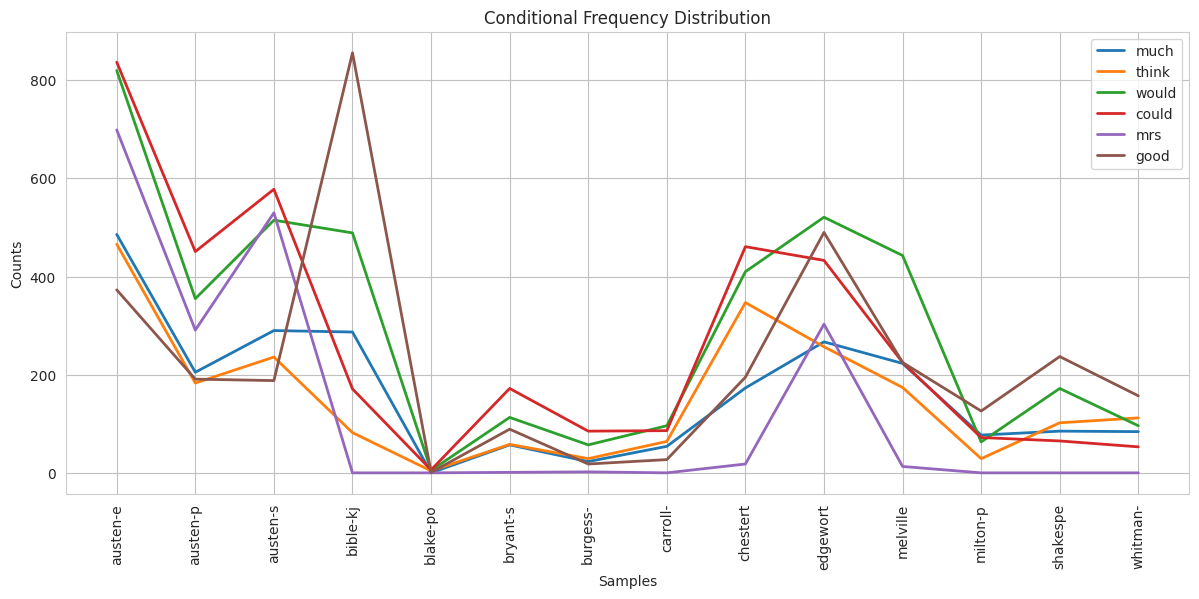

In [24]:
graph = plot_conditional_freq_dist(words, gutenberg)
plt.figure(figsize=(14.5, 6))
graph.plot(title='Conditional Frequency Distribution', cumulative=False)
plt.show()

## Тематические слова в текстах корпусов

In [25]:
lemmas(fileids, analysis_results)

,Тематические слова
austen-emma.txt,"[(Mr, 1153), (say, 874), (Emma, 865), (could, ..."
austen-persuasion.txt,"[(Anne, 497), (could, 444), (would, 351), (say..."
austen-sense.txt,"[(Elinor, 684), (say, 609), (could, 568), (Mar..."
bible-kjv.txt,"[(shall, 9760), (unto, 8940), (LORD, 6651), (s..."
blake-poems.txt,"[(thee, 42), (weep, 35), (child, 29), (like, 2..."
bryant-stories.txt,"[(little, 533), (say, 497), (come, 289), (go, ..."
burgess-busterbrown.txt,"[(Buster, 216), (Bear, 137), (Little, 111), (J..."
carroll-alice.txt,"[(say, 526), (Alice, 396), (go, 177), (little,..."
chesterton-ball.txt,"[(say, 810), (Turnbull, 544), (MacIan, 425), (..."
chesterton-brown.txt,"[(say, 538), (like, 333), (man, 303), (one, 26..."


## Топ-10 биграмм в текстах корпусов

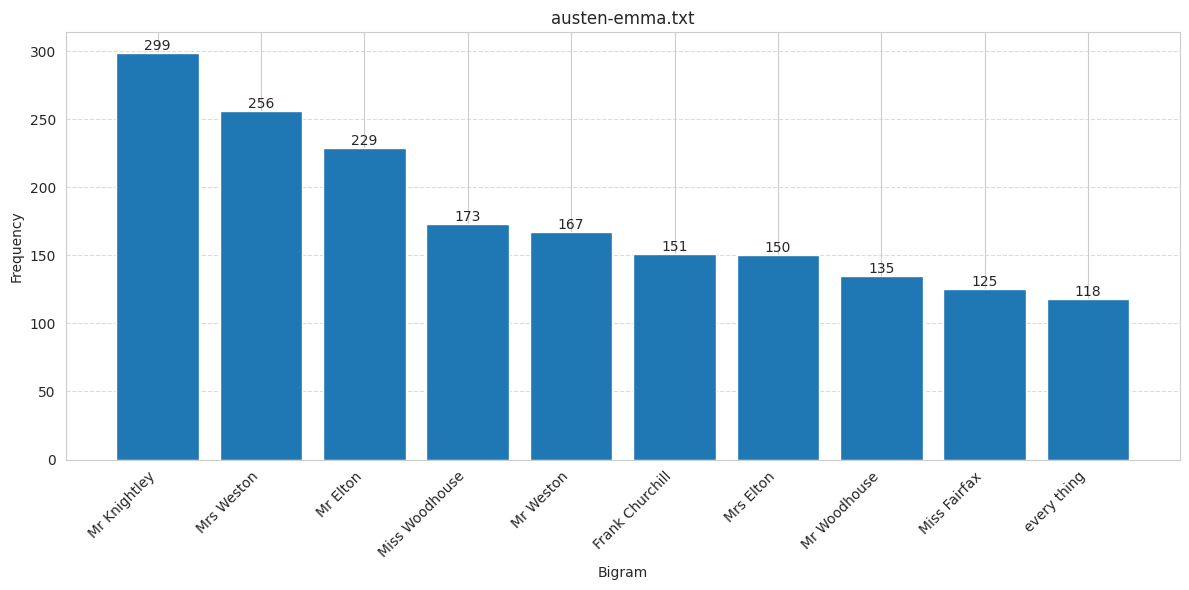

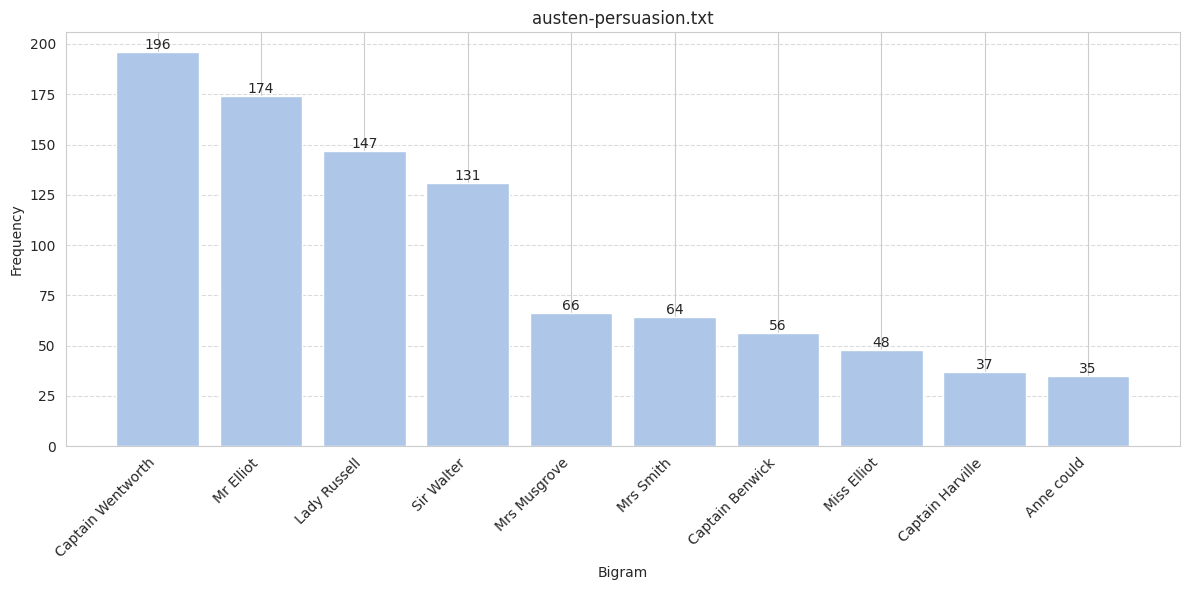

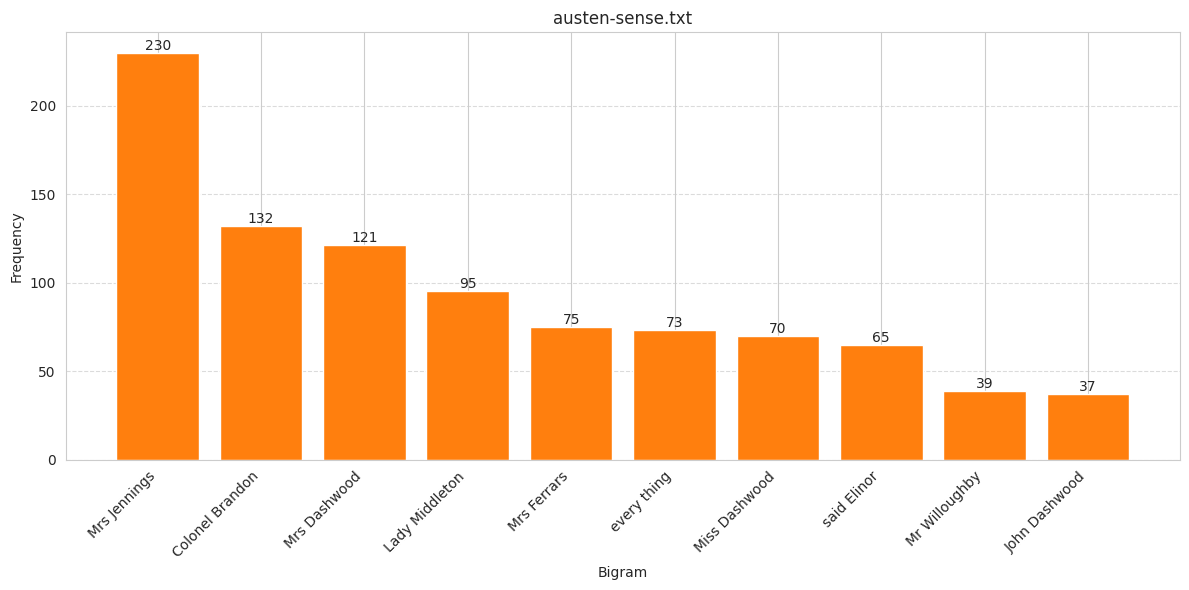

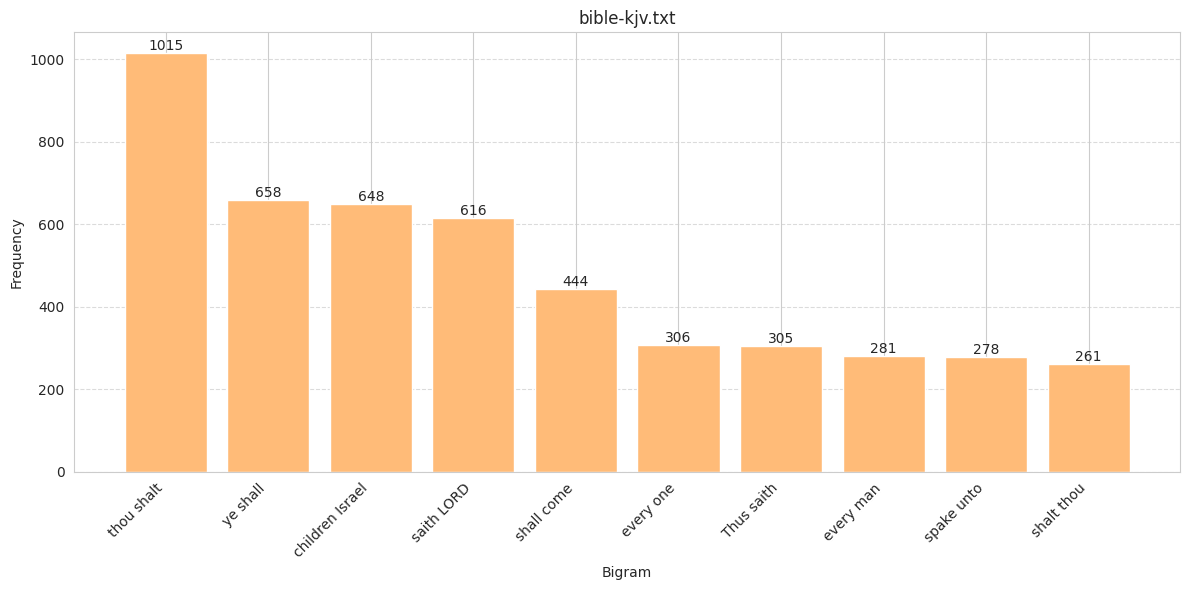

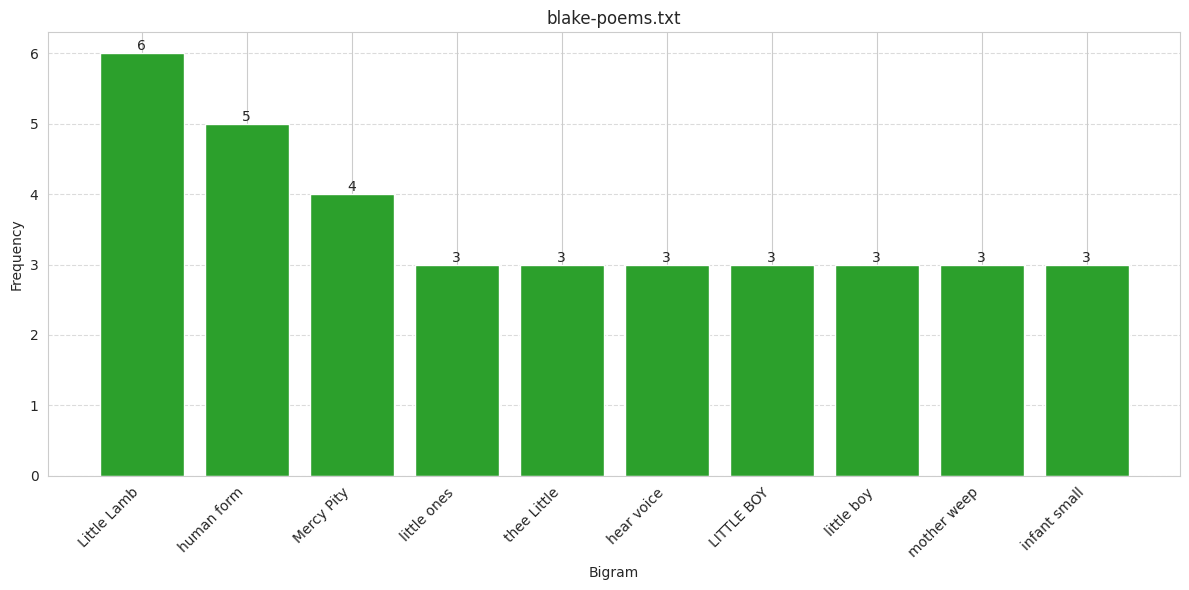

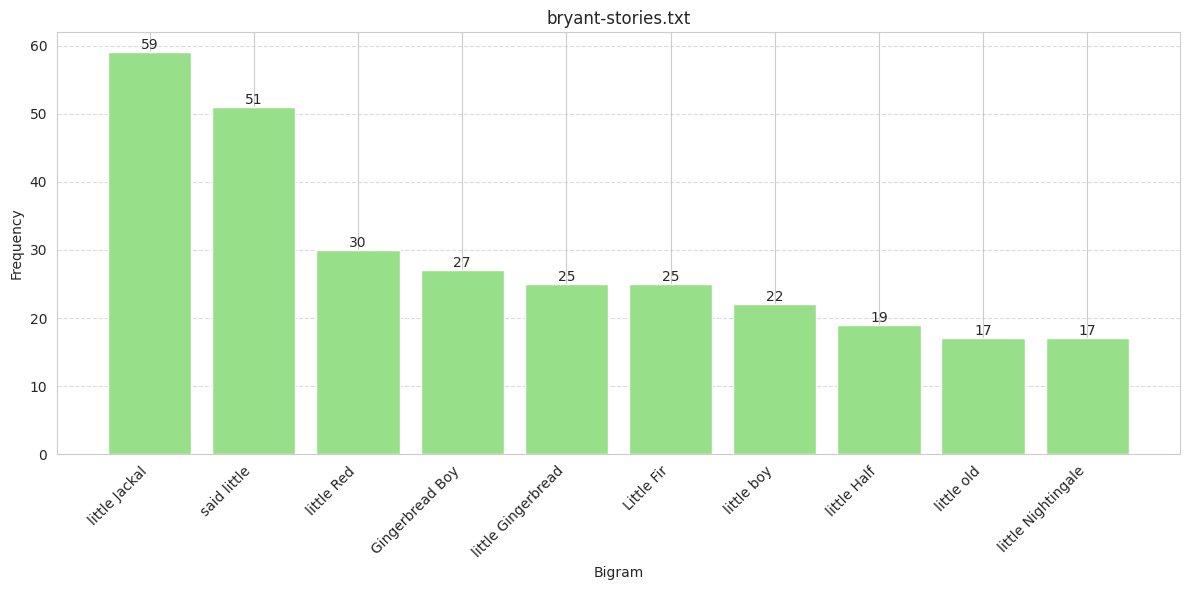

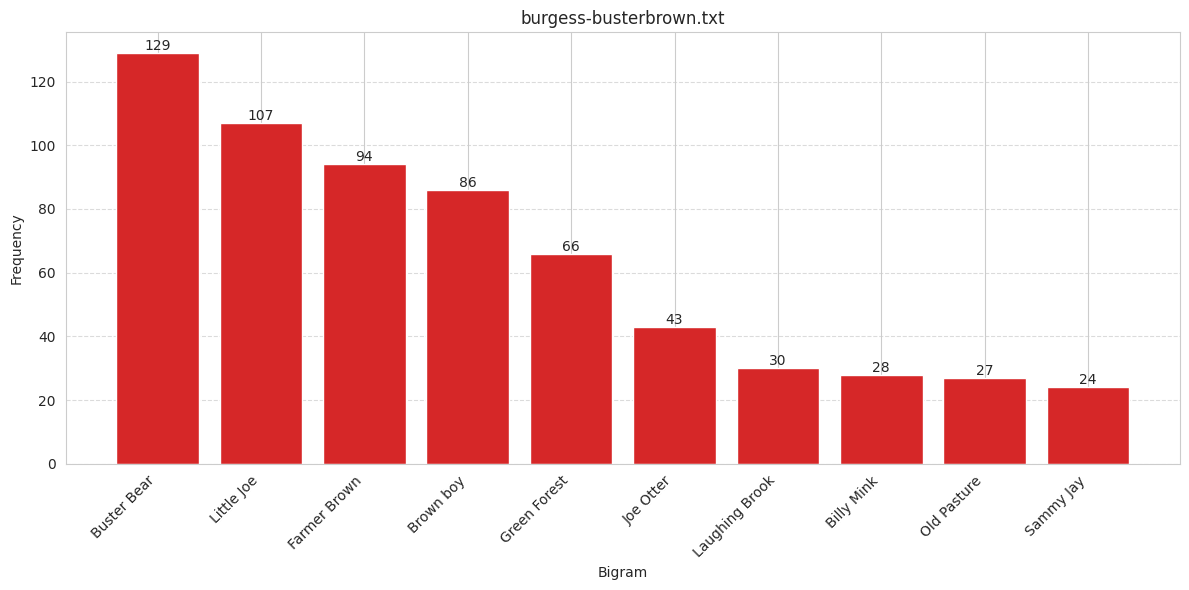

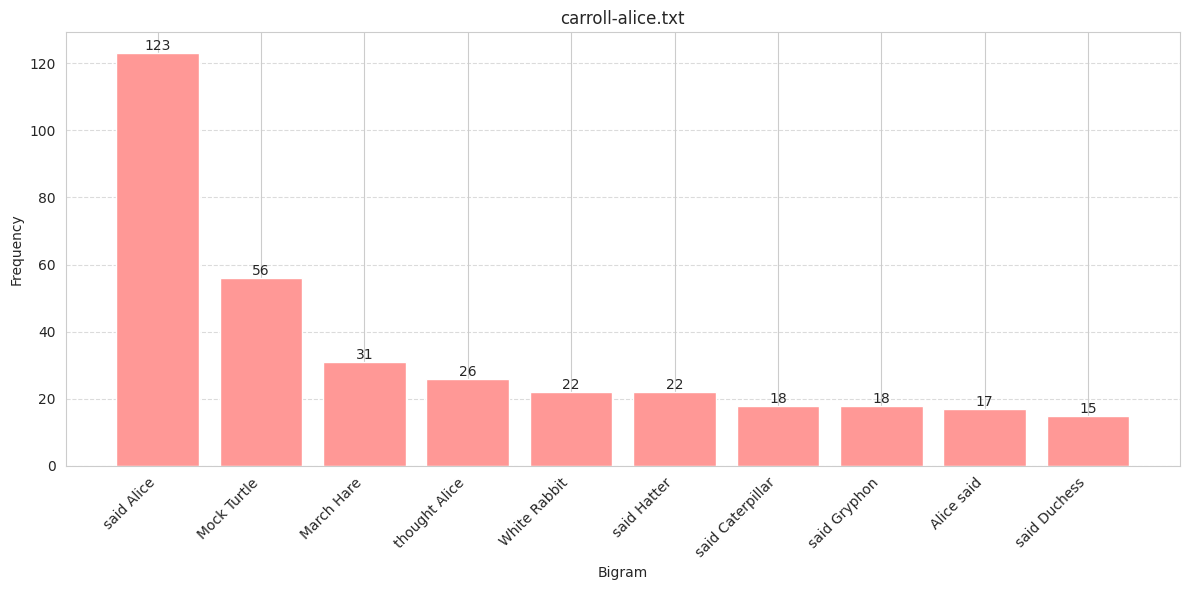

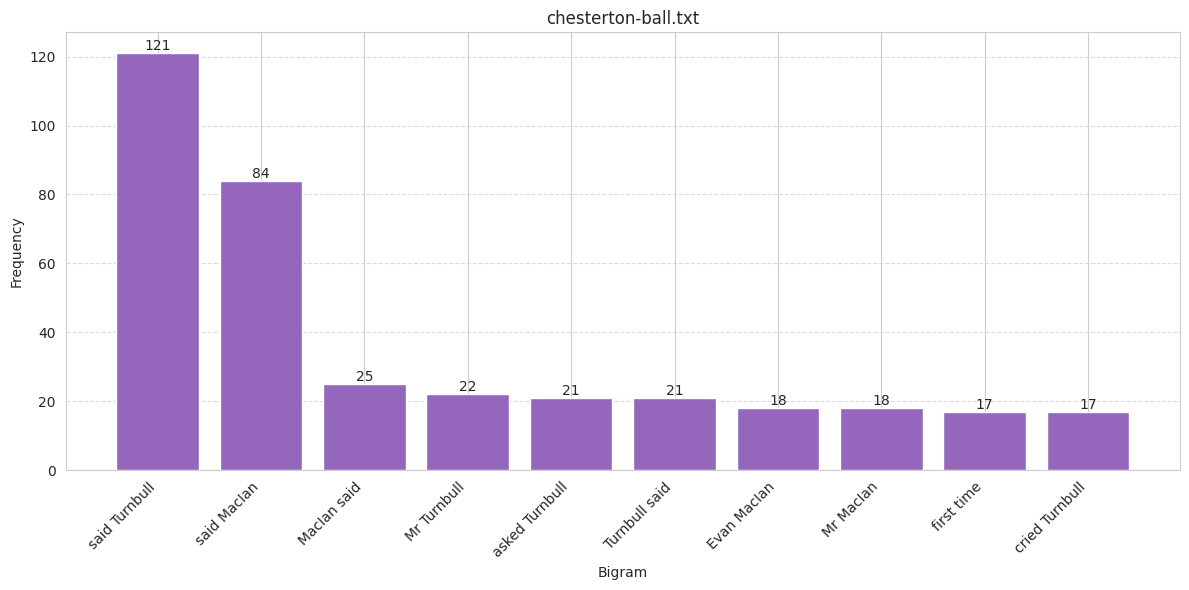

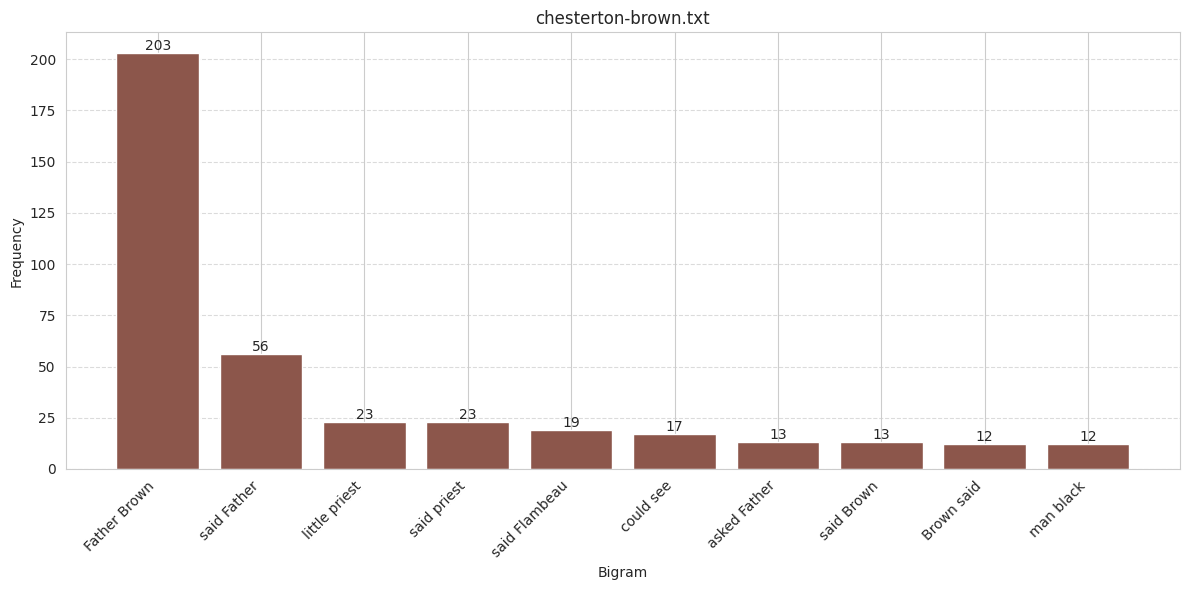

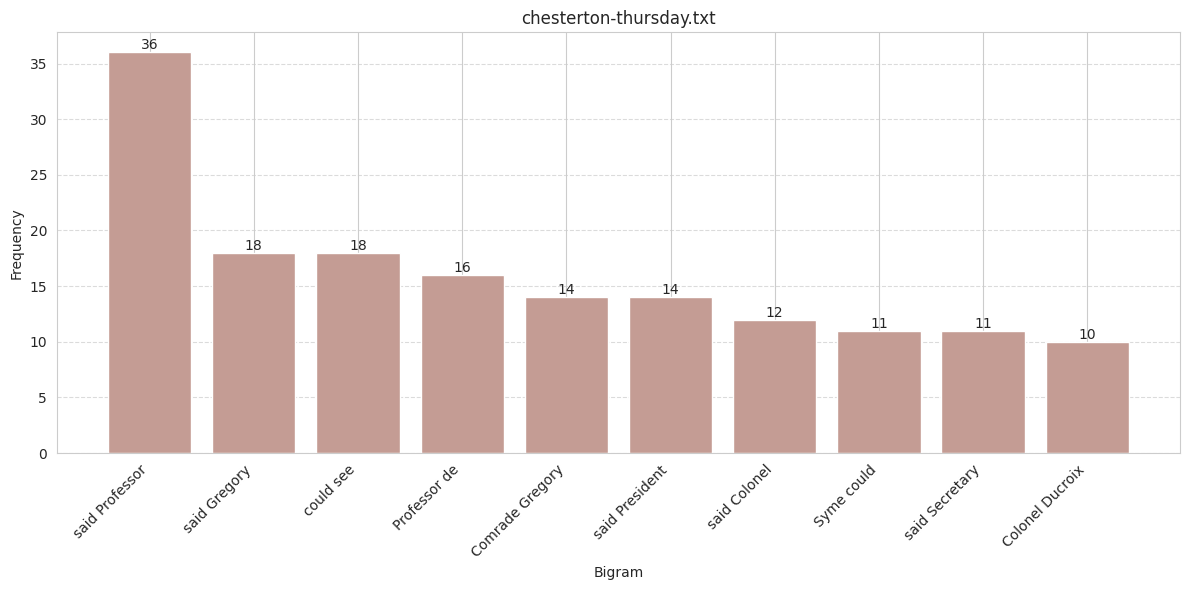

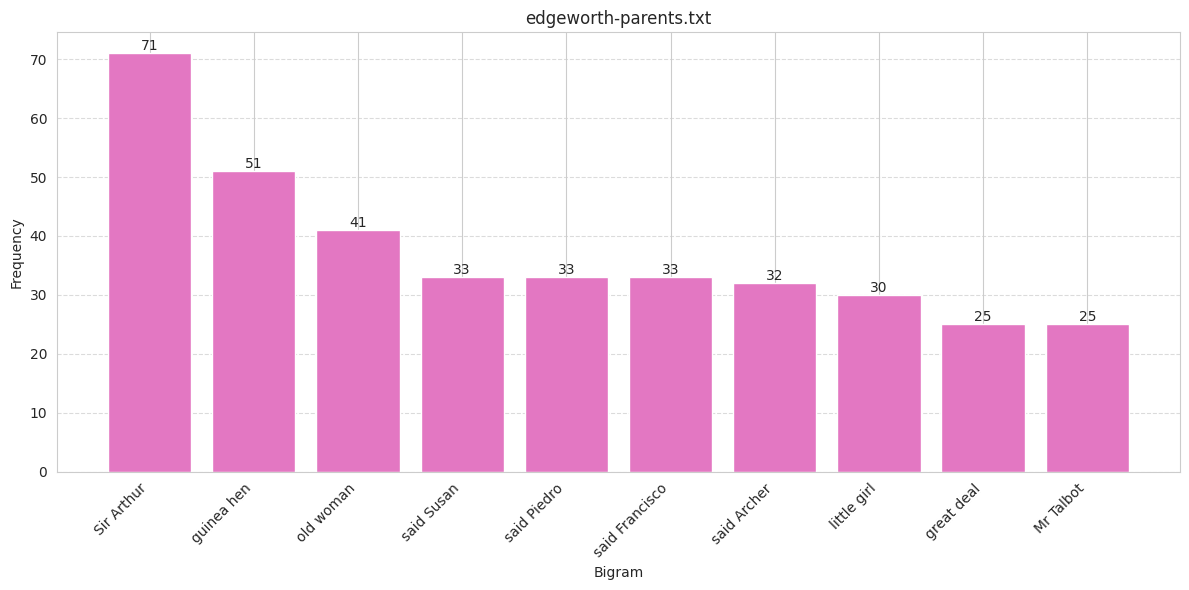

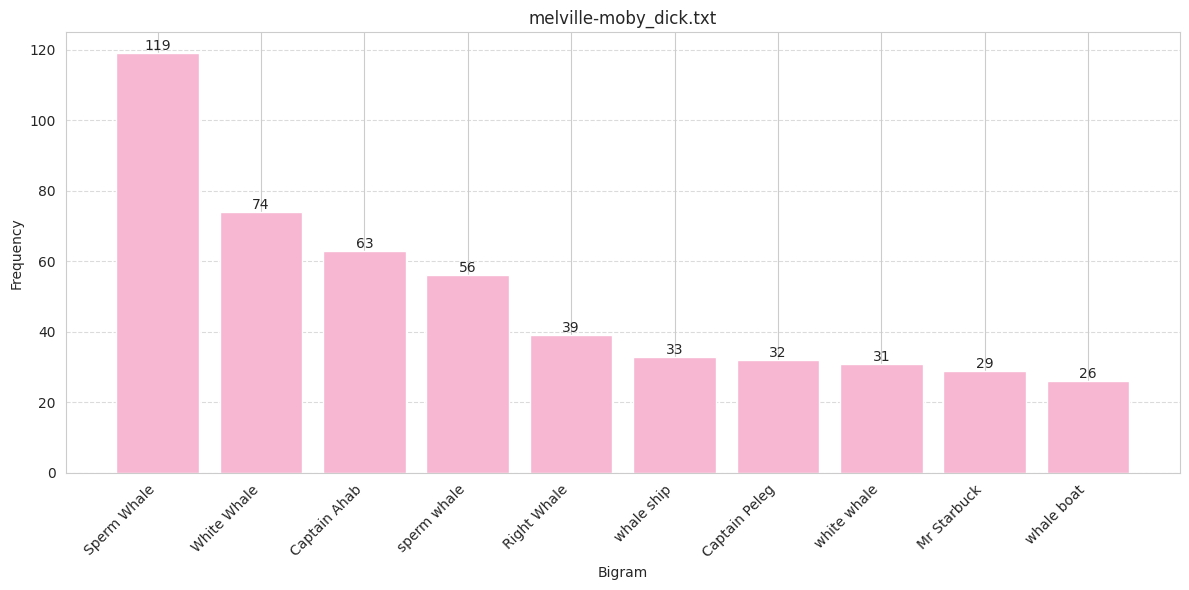

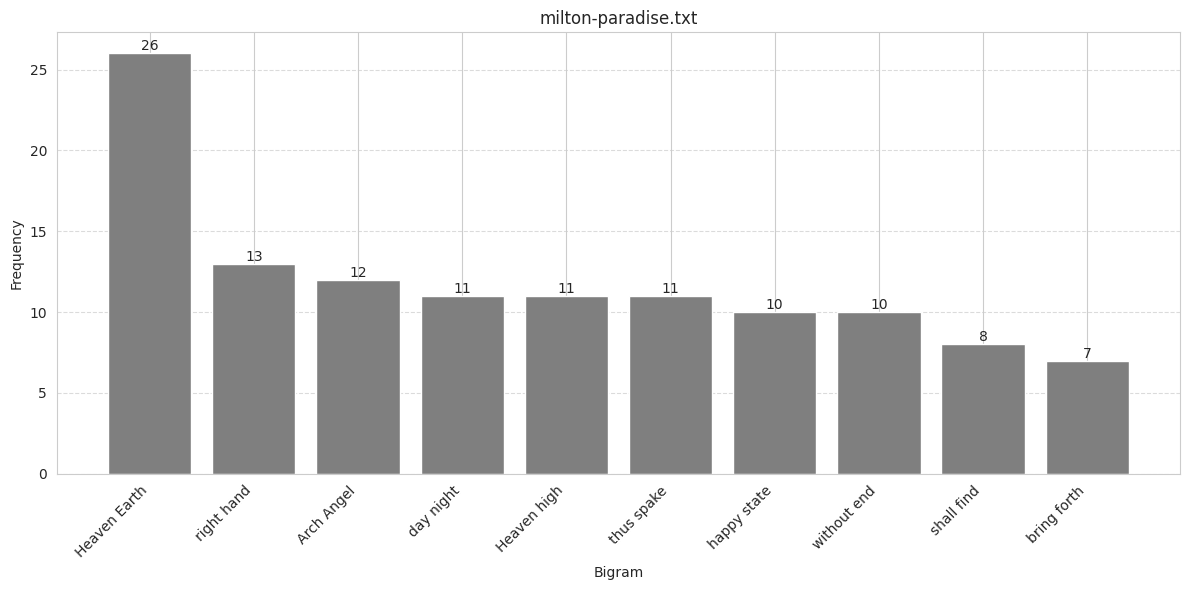

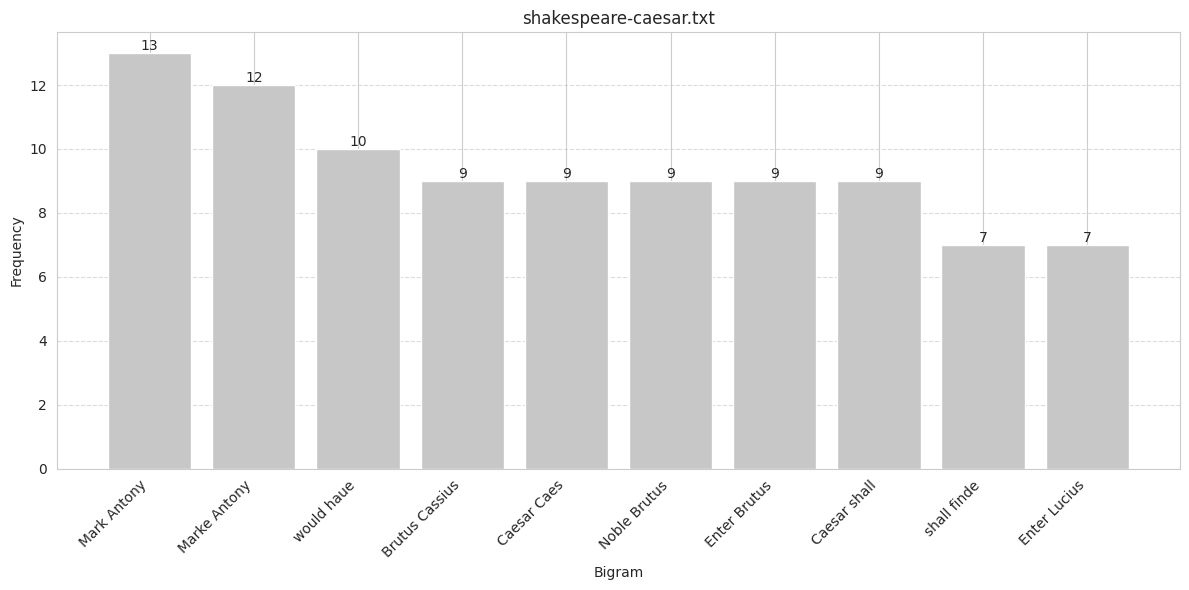

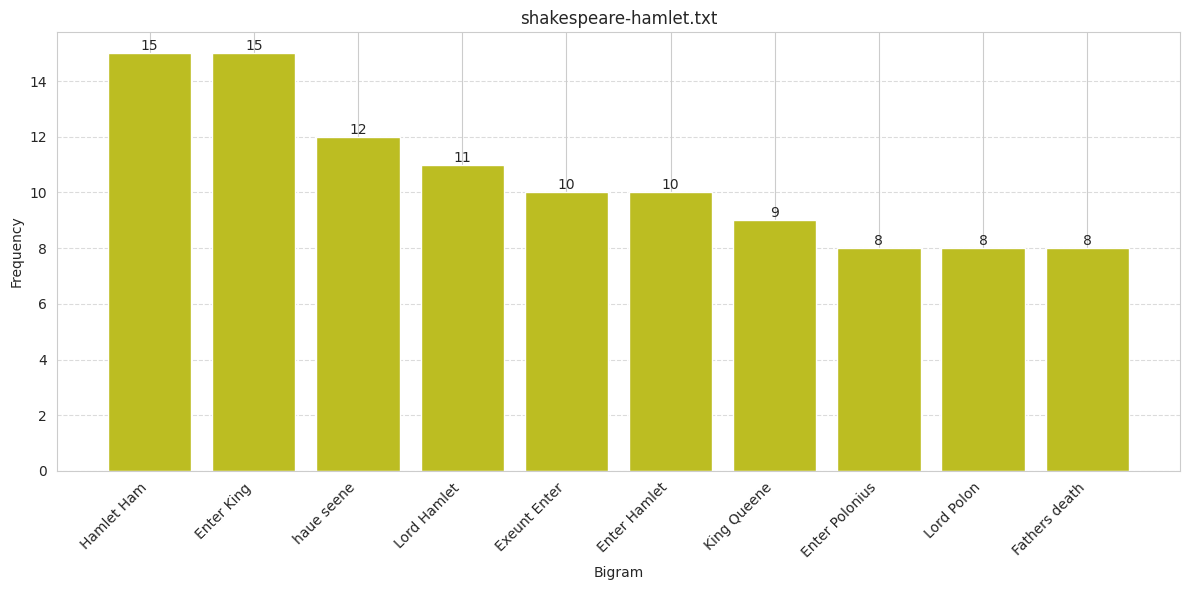

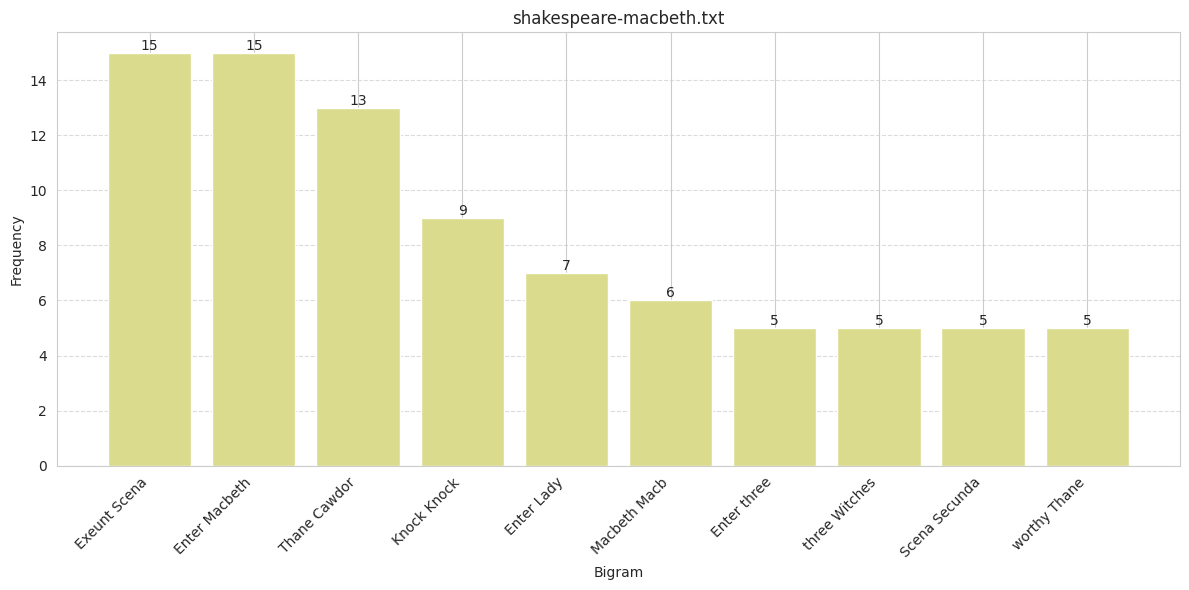

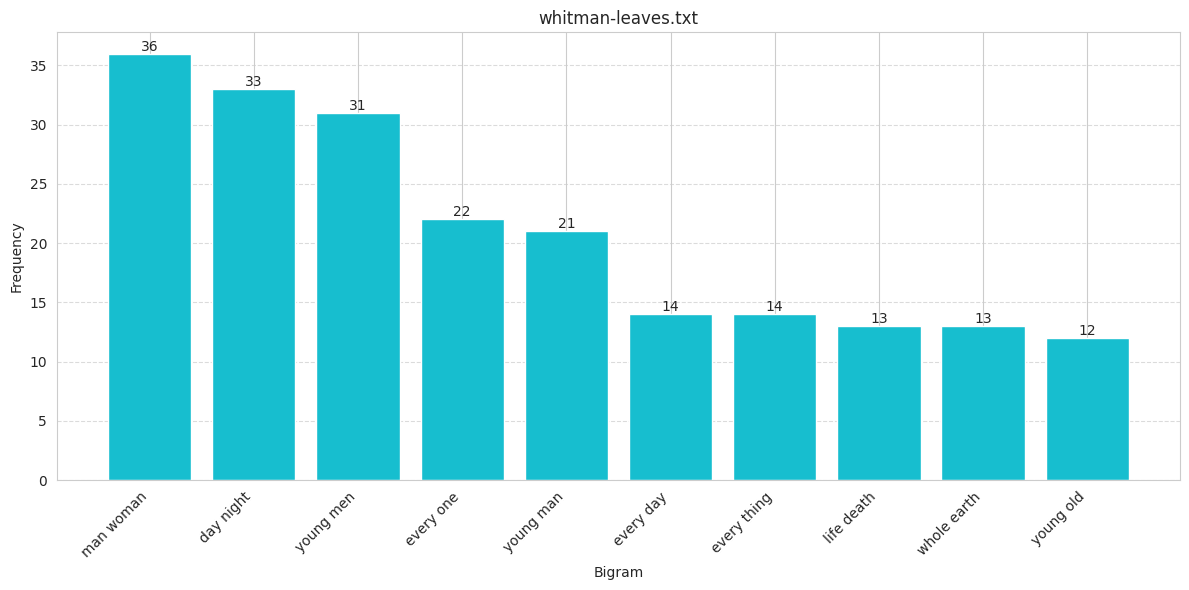

In [26]:
top_bigrams(analysis_results, fileids)